In [1]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join('./scripts')))
import warnings
warnings.filterwarnings('ignore')

In [2]:
#we will need the following libraries and modules
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
sns.set()

In [3]:
from helper import MyHelper

import utility
import plots

In [4]:
# the class has utility function we are going to use
Helper = MyHelper()

In [5]:
train_PATH = "/home/studio-lab-user/sagemaker-studiolab-notebooks/week3/data/train.csv"
test_PATH = "/home/studio-lab-user/sagemaker-studiolab-notebooks/week3/data/test.csv"
store_PATH = "/home/studio-lab-user/sagemaker-studiolab-notebooks/week3/data/store.csv"
sample_PATH = "/home/studio-lab-user/sagemaker-studiolab-notebooks/week3/data/sample_submission.csv" 


In [6]:
train_df = Helper.read_csv(train_PATH) 
test_df = Helper.read_csv(test_PATH) 
store_df = Helper.read_csv(store_PATH) 
sample_df = Helper.read_csv(sample_PATH) 

train_df.head(3)

>> file read as csv
>> file read as csv
>> file read as csv
>> file read as csv


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1


In [7]:
test_df.head(3)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0


In [8]:
store_df.head(3)


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"


In [9]:
sample_df.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


# Task 1 - Exploration of customer purchasing behavior


In [10]:
train_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [11]:
#Checking missing values 
train_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [12]:
train_store = pd.merge(train_df, store_df, how = 'inner', on = 'Store')

In [13]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [14]:
train_store['Date'] = pd.to_datetime(train_store['Date'])
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [15]:
train_store.dtypes

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object

In [16]:
train_store.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [17]:
train_store.shape

(1017209, 18)

## Handling missing data

In [18]:
train_store[pd.isnull(train_store.CompetitionDistance)].head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
263244,291,5,2015-07-31,10052,973,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
263245,291,4,2015-07-30,9030,883,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
263246,291,3,2015-07-29,8204,814,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
263247,291,2,2015-07-28,10374,943,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
263248,291,1,2015-07-27,11692,1086,1,1,0,1,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN


In [19]:
comp_dist_mean = train_store.CompetitionDistance.mean()
comp_dist_median = train_store.CompetitionDistance.median()
compd_dist_std = train_store.CompetitionDistance.std()
print('mean is', comp_dist_mean)
print('median is', comp_dist_median)
print('standard div is', compd_dist_std)
#train_store['CompetitionDistance'].fillna(comp_dist_mean)

mean is 5430.085652302903
median is 2330.0
standard div is 7715.32370027018


<Figure size 648x504 with 0 Axes>

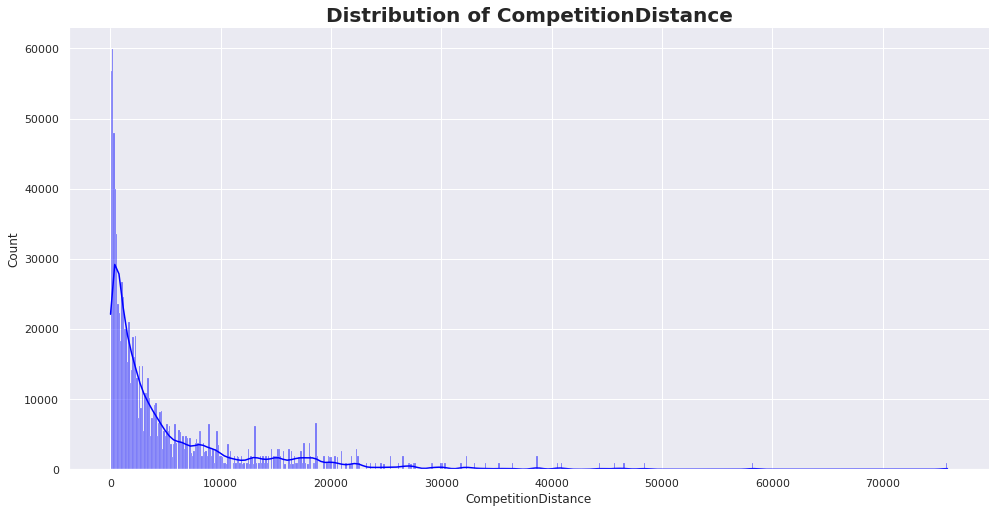

In [20]:
plots.plot_hist(train_store, 'CompetitionDistance','blue')

In [21]:
#fillingi the cometition Distance feature with median without affecting the distribution
train_store['CompetitionDistance'].fillna(train_store['CompetitionDistance'].median(), inplace = True)


In [22]:
train_store.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

## Handling the missing values for Competition Open Since Month and Competition Open Since Year
### Lets see what the distribution looks like 

<Figure size 648x504 with 0 Axes>

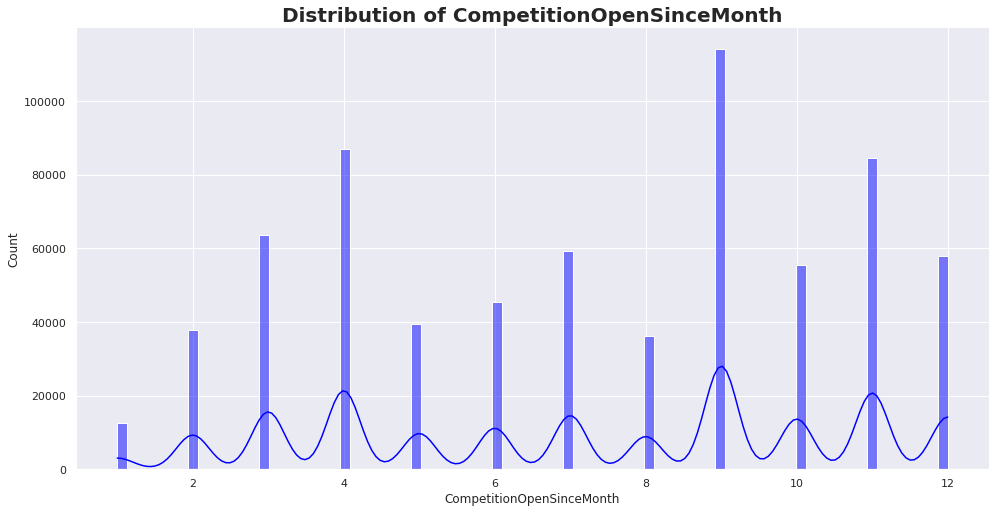

In [23]:
plots.plot_hist(train_store, 'CompetitionOpenSinceMonth','blue')

In [24]:
print('mean is' , train_store.CompetitionOpenSinceMonth.mean())
print('median is', train_store.CompetitionOpenSinceMonth.median())
print('standard div is', train_store.CompetitionOpenSinceMonth.std())

mean is 7.222865963067531
median is 8.0
standard div is 3.211832113457743


<Figure size 648x504 with 0 Axes>

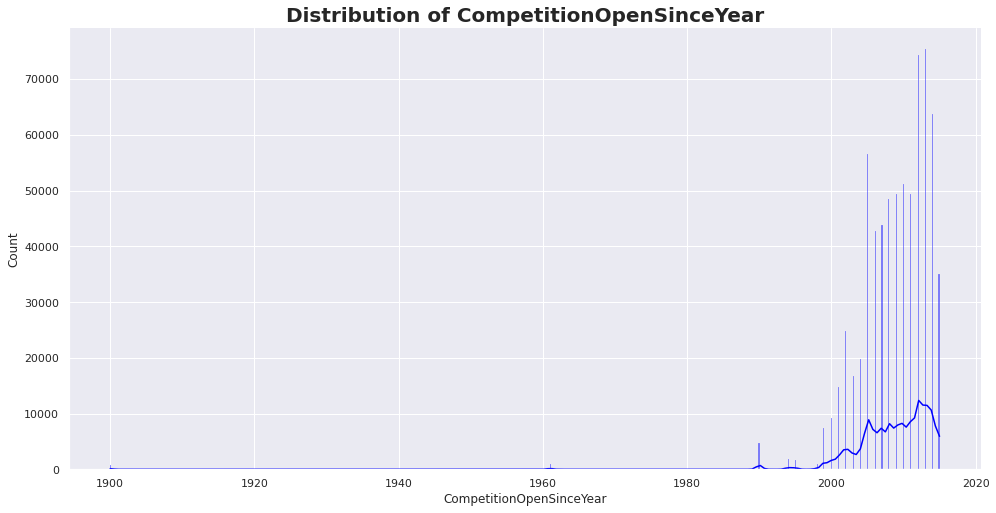

In [25]:
plots.plot_hist(train_store, 'CompetitionOpenSinceYear','blue')

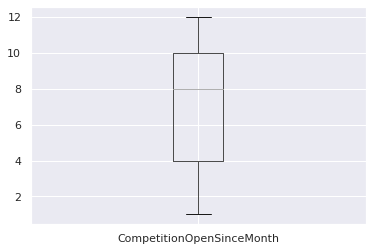

In [26]:
boxplot = train_store.boxplot(column=['CompetitionOpenSinceMonth'])

In [27]:
compsincemonth5 = train_store[['CompetitionOpenSinceMonth']]

In [28]:
compsincemonth5.interpolate(method ='pad', limit_direction ='forward', inplace = True)

In [29]:
print('mean is' , compsincemonth5.CompetitionOpenSinceMonth.mean())
print('median is', compsincemonth5.CompetitionOpenSinceMonth.median())
print('standard div is', compsincemonth5.CompetitionOpenSinceMonth.std())

mean is 7.230953520859528
median is 7.0
standard div is 3.187480004027139


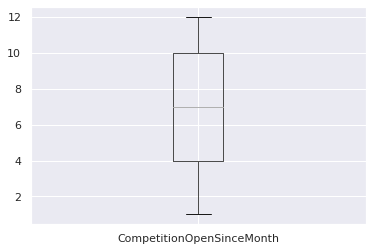

In [30]:
boxplot = compsincemonth5.boxplot(column=['CompetitionOpenSinceMonth'])

<Figure size 648x504 with 0 Axes>

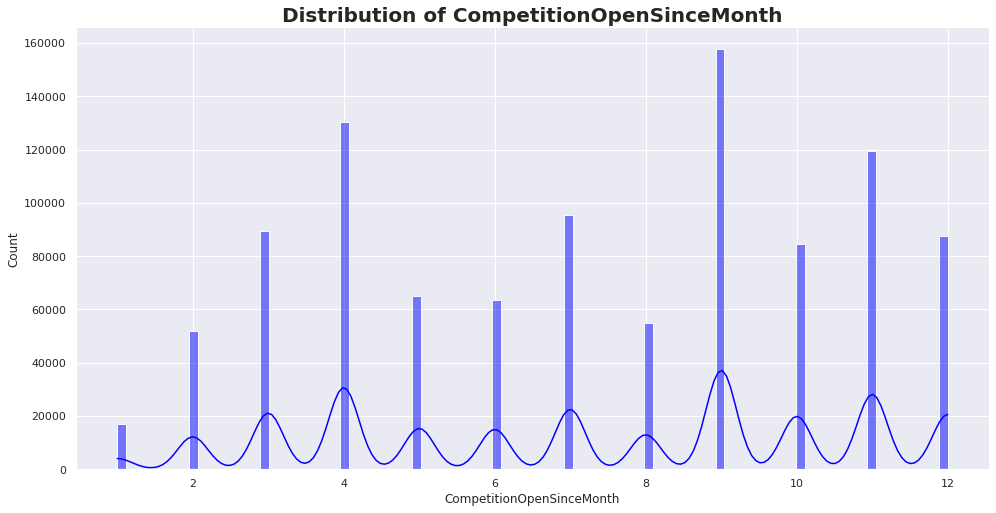

In [31]:
plots.plot_hist(compsincemonth5, 'CompetitionOpenSinceMonth','blue')

In [32]:
compsinceyear2 = train_store[['CompetitionOpenSinceYear']]

In [33]:
compsinceyear2.interpolate(method ='pad', limit_direction ='forward', inplace = True)


In [34]:
compsinceyear2.isnull().sum()

CompetitionOpenSinceYear    0
dtype: int64

In [35]:
print('mean is' , compsinceyear2.CompetitionOpenSinceYear.mean())
print('median is', compsinceyear2.CompetitionOpenSinceYear.median())
print('standard div is', compsinceyear2.CompetitionOpenSinceYear.std())

mean is 2008.5814616268633
median is 2010.0
standard div is 6.631930129452742


<Figure size 648x504 with 0 Axes>

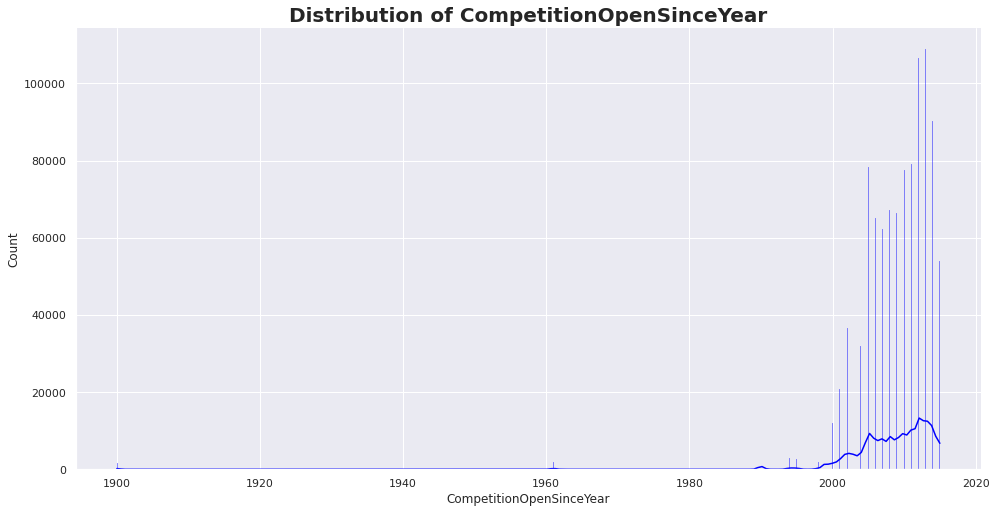

In [36]:
plots.plot_hist(compsinceyear2, 'CompetitionOpenSinceYear','blue')

In [37]:
# This case is pretty straighforward, all the missing values comes from fields 
# where Promo2=0 which means there are no continuous promotional activities 
# for those stores. Having no promotion means those fields have to be 0 
# as well since they are linked to Promo2.
train_store.Promo2SinceWeek.fillna(0,inplace=True)
train_store.Promo2SinceYear.fillna(0,inplace=True)
train_store.PromoInterval.fillna(0,inplace=True)

In [38]:
train_store.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance               0
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek                   0
Promo2SinceYear                   0
PromoInterval                     0
dtype: int64

In [39]:
train_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


In [40]:
train_store.interpolate(method ='pad', limit_direction ='forward', inplace = True)


In [41]:
train_store.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [43]:
utility.percent_missing(train_store)


The dataset contains 0.0 % missing values.


In [45]:
Version_1 = "./data/train.csv"
Helper.save_csv(train_store, Version_1)

>> File Successfully Saved.!!!


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1115,6,2013-01-05,4771,339,1,0,0,1,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1115,5,2013-01-04,4540,326,1,0,0,1,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1115,4,2013-01-03,4297,300,1,0,0,1,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1115,3,2013-01-02,3697,305,1,0,0,1,d,c,5350.0,4.0,2006.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
